In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dpii=200;

In [3]:
pylab.rcParams['figure.figsize'] = 14, 10

In [4]:
filename='ATA_data.csv'

In [5]:
df = pd.read_csv(filename)
df =df.drop('Unnamed: 0',1)

In [6]:
df.columns

Index([u'datetime', u'ad_id', u'app_name', u'app_categories',
       u'publisher_name', u'os', u'osv', u'make', u'model', u'country',
       u'city', u'language', u'impression', u'clicked', u'installed',
       u'device', u'app_type', u'weekday', u'hours', u'week'],
      dtype='object')

In [7]:
df.shape

(1645555, 20)


#### Impressions to install bar plot with relation to the days in a week

In [8]:
df.groupby(['weekday', 'hours']).sum();

In [9]:
df_filter = df[['weekday', 'hours', 'app_type', 'os', 'country', 'impression', 'clicked', 'installed']]

In [10]:
grouped_w=df.groupby('weekday')['impression','installed'].sum()

In [11]:
days=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


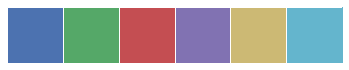

In [12]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [13]:
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [14]:
deep = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]

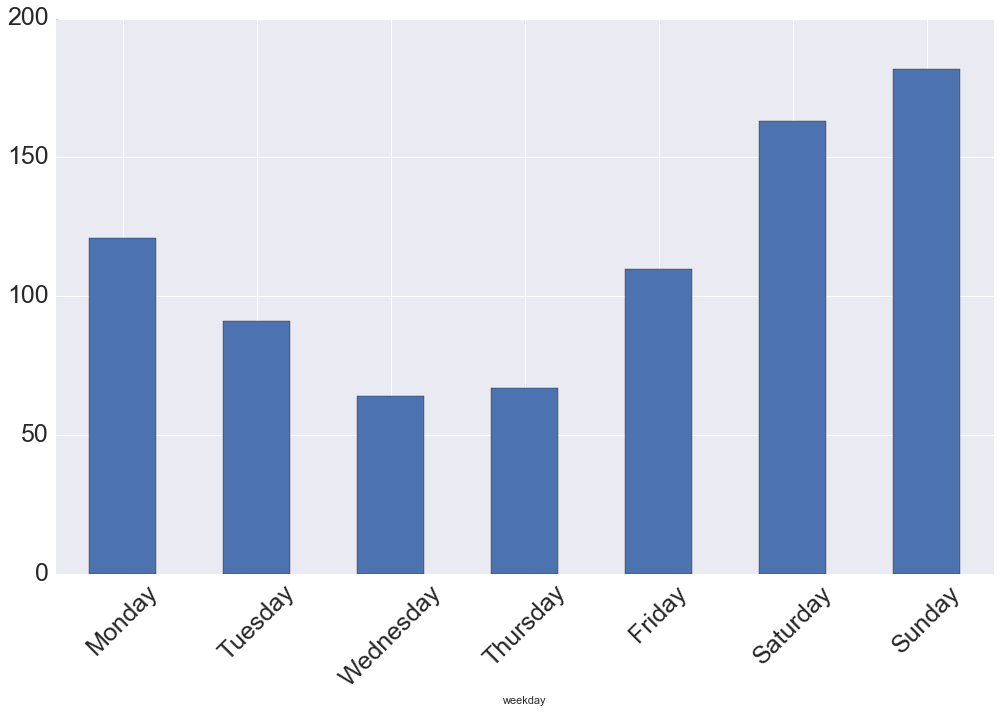

In [115]:
day_plot = df.groupby('weekday')['installed'].sum().plot(kind='bar', color = deep[0])
plt.xticks(grouped_w.index-1, days, rotation=45, fontsize = 25);
plt.yticks(fontsize = 25);
plt.legend(fontsize = 0, loc = 2);
plt.tight_layout()
plt.savefig('Impressions_Installs_Daily.png', dpi=dpii)

In [16]:
grouped_wCI=df.groupby('weekday')['clicked','installed'].sum()

In [17]:
grouped_wCI=df.groupby(['country', 'weekday'])['impression','installed'].sum()

In [18]:
grouped_wCI

impression  installed
country weekday                       
CAN     1             53316         25
        2             35586         17
        3             38387         10
        4             37502         16
        5             43418         19
        6             59943         28
        7             69895         48
USA     1            187589         96
        2            160023         74
        3            156078         54
        4            145990         51
        5            177767         91
        6            256212        135
        7            223849        134

In [19]:
grouped_wCI['ratio'] = grouped_wCI['installed']/grouped_wCI['impression']

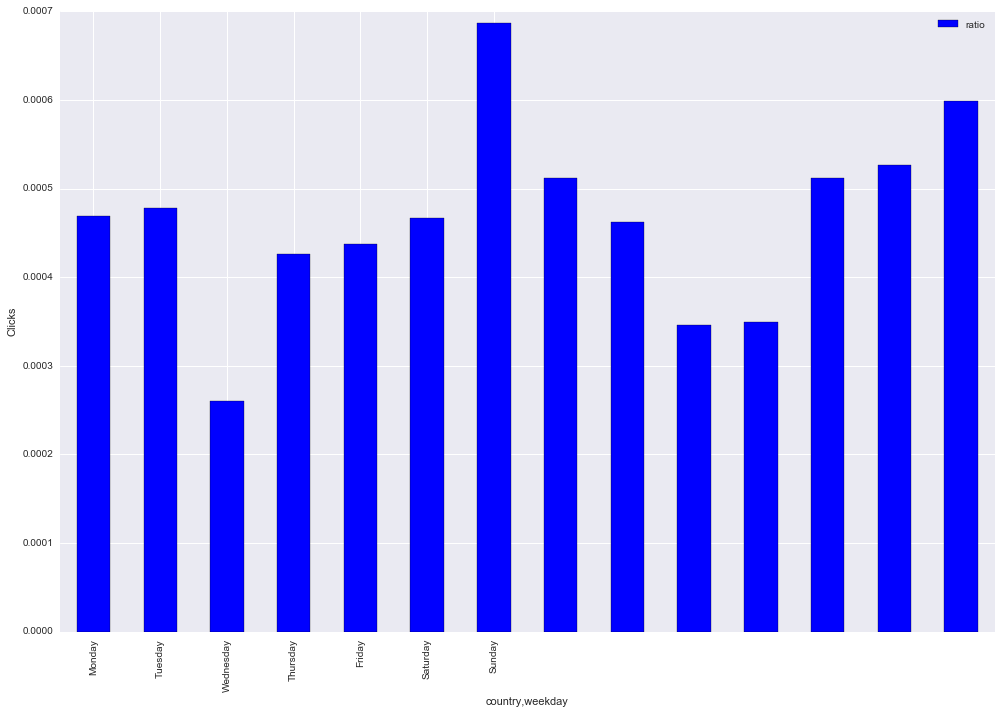

In [20]:
day_plot2 = grouped_wCI.drop(['installed','impression'],1).plot(kind='bar')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Daily.png', dpi=dpii)

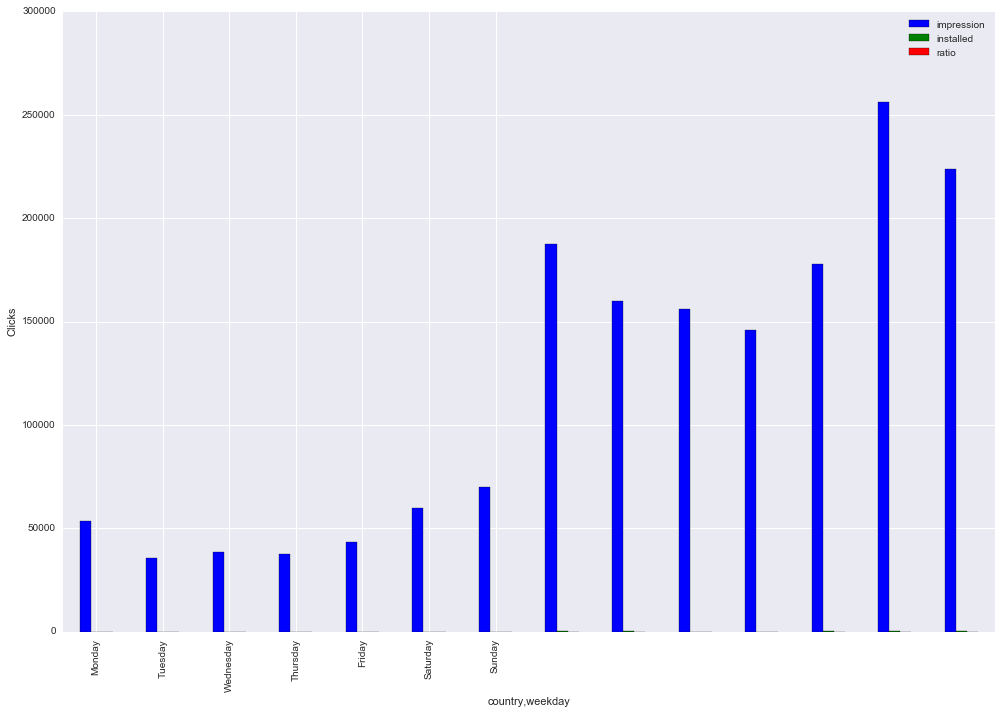

In [21]:
day_plot2 = grouped_wCI.plot(kind='bar')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Daily.png', dpi=dpii)

#### Install to impression bar plot comparison on a per hour basis

In [22]:
grouped_h=df.groupby('hours')['impression','installed'].sum()
grouped_hCI=df.groupby('hours')['clicked','installed'].sum()

In [23]:
df_LA=df[df['city'] == 'Los Angeles']

In [24]:
df_NY=df[df['city'] == 'New York']

In [25]:
dfdf=df[df['country'] == 'CAN']

In [26]:
dfdf.shape

(338047, 20)

In [27]:
grouped_LA=df_LA.groupby('hours')['impression','installed'].sum()
grouped_NY=df_NY.groupby('hours')['impression','installed'].sum()

In [28]:
grouped_LA

,impression,installed
hours,,
0,1136,2
1,1285,0
2,1119,2
3,1206,1
4,1219,0
5,1368,1
6,1086,0
7,562,0
8,383,0


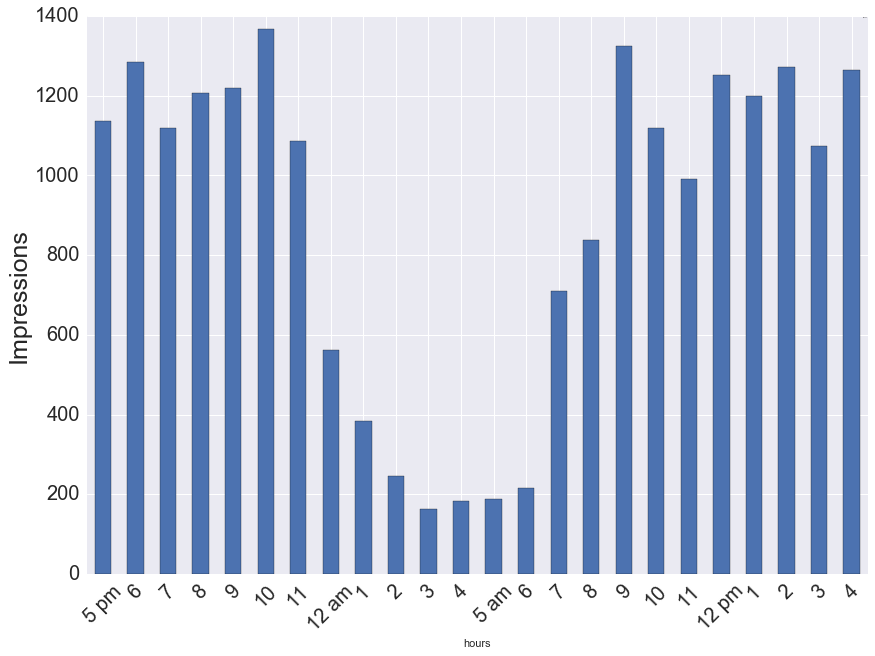

In [64]:
LA_plot = grouped_LA.drop('installed',1).plot(kind='bar', color = deep[0])
plt.xticks(grouped_LA.index, hours, rotation=45, fontsize = 20);
plt.yticks(fontsize = 20);
LA_plot.set_ylabel('Impressions');
plt.ylabel('Impressions', fontsize = 25);
plt.legend(fontsize = 0);
plt.savefig('LA_Time.png', dpi=dpii)

#### NY_plot = grouped_NY.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_NY.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
#plt.tight_layout()
#plt.savefig('Impression_Installs_Hourly.png', dpi=dpii

In [ ]:
grouped_h['ratio']=grouped_h['installed']/grouped_h['impression']*100

In [ ]:
hr_range=map(str, range(4,11 + 1))

In [ ]:
hr_range

In [30]:
hours=['5 pm'] + ['6', '7', '8', '9', '10', '11','12 am','1', '2', '3', '4'] + ['5 am'] + ['6', '7', '8', '9', '10', '11','12 pm','1', '2', '3', '4']

In [ ]:
hr_plot = grouped_h.drop('ratio',1).plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_h.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impression_Installs_Hourly.png', dpi=dpii)

In [ ]:
ratio_hr_plot = grouped_h['ratio'].plot(kind = 'bar')
ratio_hr_plot.set_ylabel('Ratio of Installs per Impression');
plt.tight_layout()
plt.savefig('Impressions_Installs_HourlyRatio.png', dpi=dpii)

In [ ]:
hr_plot2 = grouped_hCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_hCI.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Hourly.png', dpi=dpii)

In [ ]:
grouped_wh_Ins=df.groupby(['weekday', 'hours'])[['installed']].sum()

In [ ]:
grouped_wh_Ins.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Ins.unstack().index-1, days, rotation='vertical');
plt.ylabel('Installs');
plt.tight_layout()
plt.savefig('Installs_Daily_Summary.png', dpi=dpii)

In [ ]:
grouped_wh_Imp=df.groupby(['weekday', 'hours'])[['impression']].sum()

In [ ]:
grouped_wh_Imp.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Imp.unstack().index-1, days, rotation='vertical');
plt.ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Daily_Summary.png', dpi=dpii)

In [ ]:
grouped_wh_C=df.groupby(['weekday', 'hours'])[['clicked']].sum()

In [ ]:
grouped_wh_C.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_C.unstack().index-1, days, rotation='vertical');
plt.ylabel('Clicks');
plt.tight_layout()
plt.savefig('Clicks_Daily_Summary.png', dpi=dpii)

In [32]:
cols_to_keep=['weekday','hours','impression','installed','clicked', 'app_type']
mini_df=df[cols_to_keep]

In [33]:
grouped_Imp_Ins_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'installed']].sum().reset_index()

In [34]:
grouped_Imp_Cli_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'clicked']].sum().reset_index()

#### Categorical Inspection

In [35]:
grouped_cat_days=mini_df.groupby(['app_type', 'weekday'])[['impression', 'clicked', 'installed']].sum()

In [36]:
grouped_cat_days=grouped_cat_days.reset_index()

In [37]:
grouped_cat=mini_df.groupby(['app_type'])[['impression', 'clicked', 'installed']].sum()

In [38]:
app_type_index=grouped_cat_days['app_type'].unique()

In [87]:
app_type_index[5] = 'health'

In [88]:
app_type_index[13] = 'social'

In [89]:
app_type_index

array(['books', 'education', 'entertainment', 'finance', 'games', 'health',
       'lifestyle', 'music', 'navigation', 'news', 'photography',
       'productivity', 'reference', 'social', 'sports', 'travel',
       'utilities', 'weather'], dtype=object)

In [90]:
grouped_cat['ratio']=grouped_cat['installed']/grouped_cat['impression']*100

In [110]:
cat_index[7]

'social_networking'

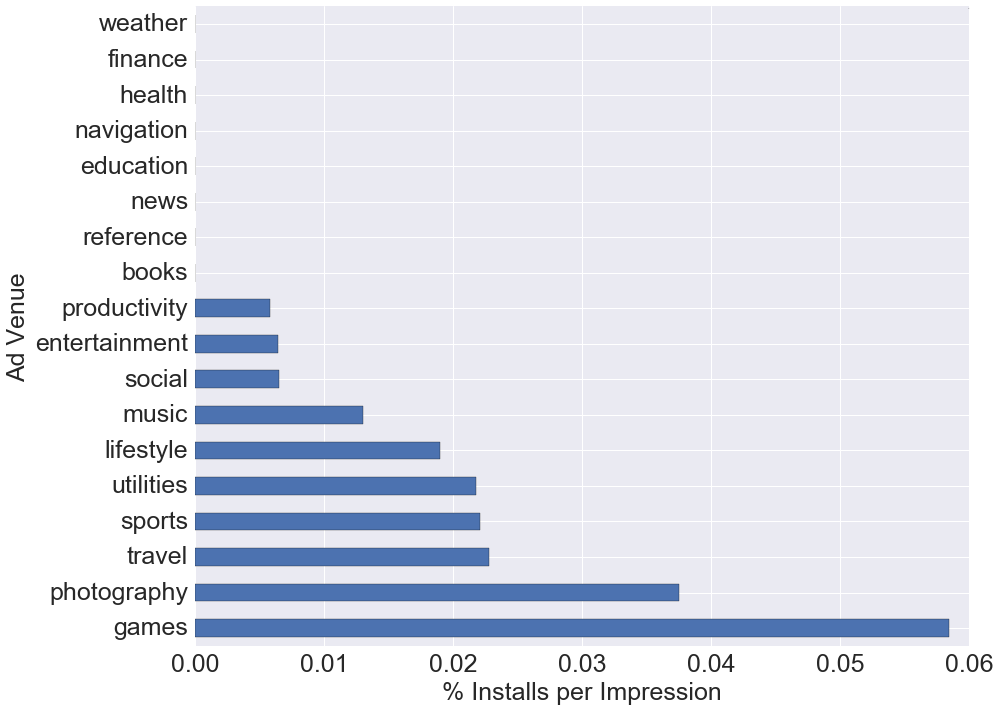

In [111]:
cat = grouped_cat.drop(['clicked', 'installed', 'impression'],1).sort_values(by ='ratio',axis =0, ascending = False)
cat_index = list(cat.index)
cat_index[-3] = 'health'
cat_index[7] = 'social'
cat_plot = cat.plot(kind='barh', color = deep[0])
plt.xticks(fontsize = 25);
plt.yticks(range(0,len(cat_index)), cat_index, fontsize = 25)
plt.ylabel('Ad Venue', fontsize = 25);
plt.xlabel('% Installs per Impression',fontsize = 25)
plt.legend(fontsize = 0)
plt.tight_layout()
plt.savefig('Categorical_Feature_Exploration.png', dpi=dpii)

In [ ]:
grouped_cat_days['ratio']=grouped_cat_days['clicked']/grouped_cat_days['impression']

In [ ]:
grouped_cat_days.groupby('ratio').sum().reset_index();

In [ ]:
df[df['impression'] > 5].index

In [ ]:
df['impression']